# Discrete Fourier Transform - DFT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft

%matplotlib inline

In [2]:
plt.style.use('seaborn-poster')

Text(0, 0.5, 'Amplitude')

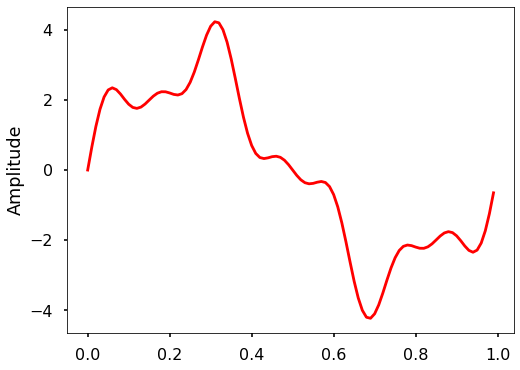

In [3]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0, 1, ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

In [4]:
def DFT(x):
    """
    Function to calculate the discrete Fourier Transform
    of a 1D real-valued signal x
    """
    
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [5]:
X = DFT(x)

Text(0, 0.5, 'DFT Amplitude |X(freq)|')

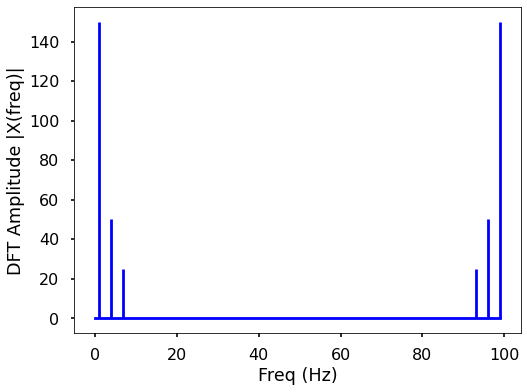

In [6]:
# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

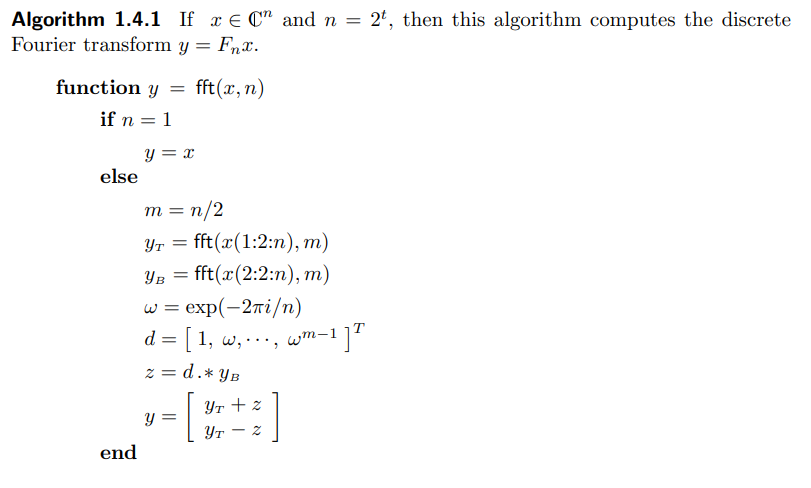

In [7]:
def fft(x, n):
    """
    DFT when n = 2^t, y = Fn * x
    """
    if n == 1:
        return x
    m = n // 2
    y_T = fft(x[::2], m)
    y_B = fft(x[1::2], m)
    omega = np.exp(-2j * np.pi / n)
    d = (omega ** np.arange(m)).reshape((m, 1))
    z = d * y_B
    y = np.concatenate((y_T + z, y_T - z))
    return y

In [8]:
fft(np.array([0, 1, 0, 0]).reshape((4, 1)), 4)

array([[ 1.000000e+00+0.j],
       [ 6.123234e-17-1.j],
       [-1.000000e+00+0.j],
       [-6.123234e-17+1.j]])

In [9]:
np.linalg.norm(scipy.fft.fft(np.array([0, 1, 0, 0])).reshape((4, 1)) - fft(np.array([0, 1, 0, 0]).reshape((4, 1)), 4))

8.659560562354933e-17